# **Imports and Setup**

In [1]:
#Imports and setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.utils import resample
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# **Load and Explore Dataset**

In [2]:
df = pd.read_csv('loan_data.csv')

# **Basic Information about the dataset**

In [3]:
# Display basic information,Statistical summary about the dataset
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_l

In [5]:
print("\nStatistical Summary:")
display(df.describe().T)


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


# **Missing value and duplicates**

In [6]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


# **Unique value in each categorical Column**

In [7]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
df.nunique()


Unique Values in Each Column:


person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [8]:

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)



Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [9]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


# **Visualization for Exploratory Data Analysis**

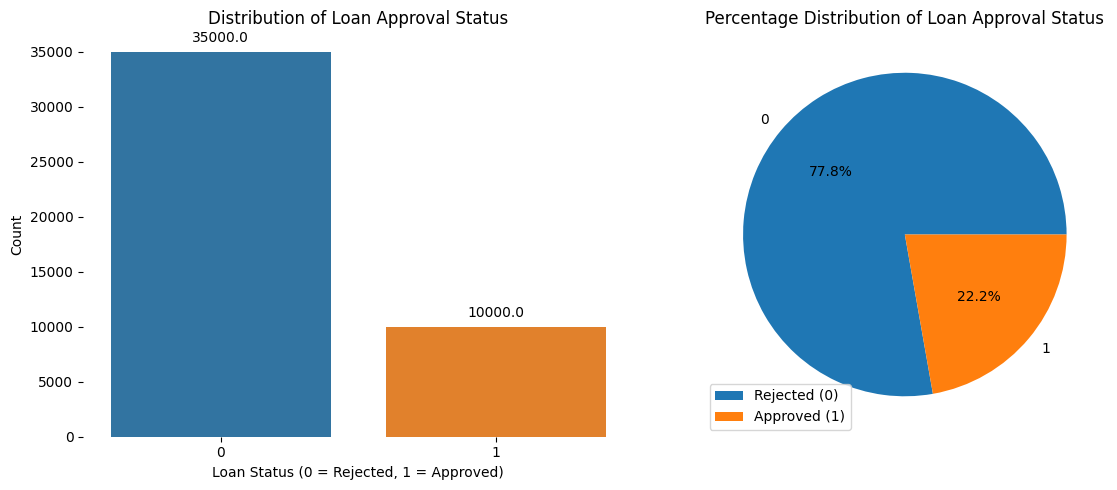

In [10]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [11]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

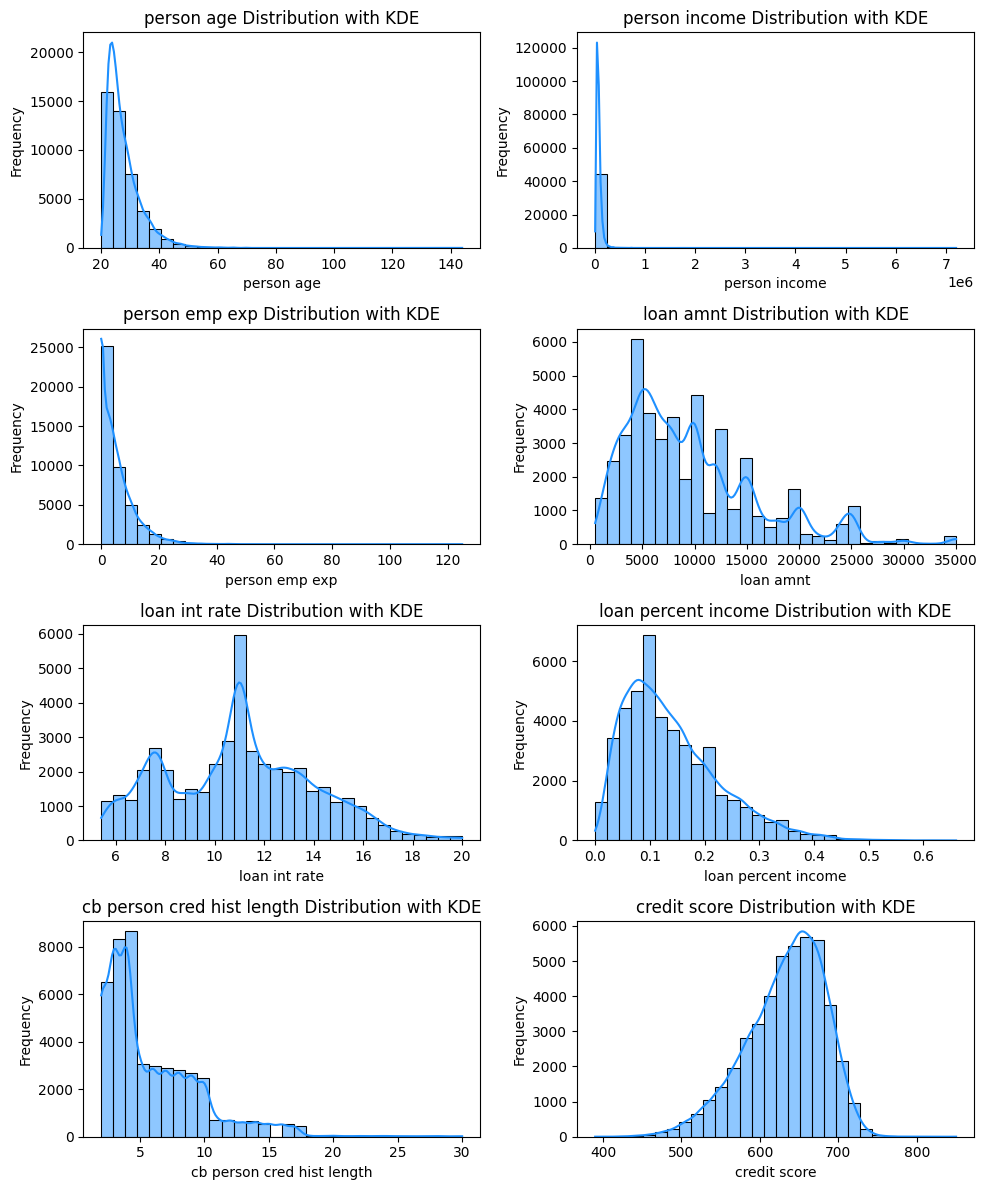

In [12]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

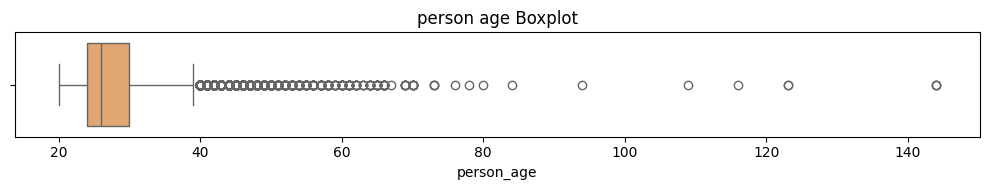


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


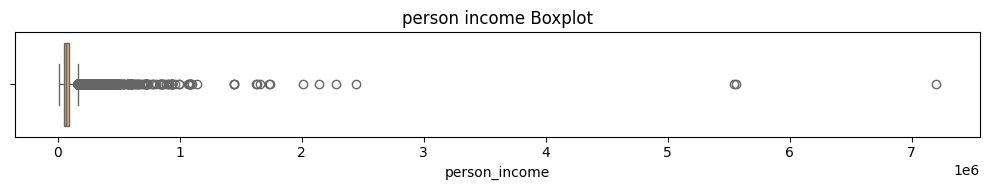


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


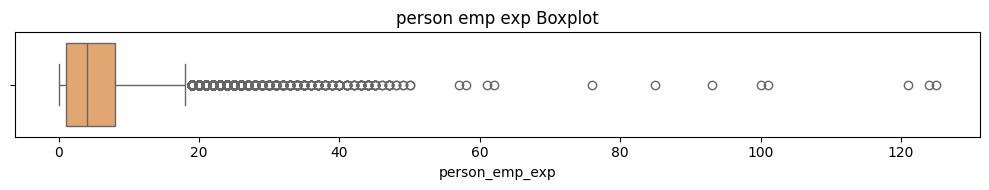


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


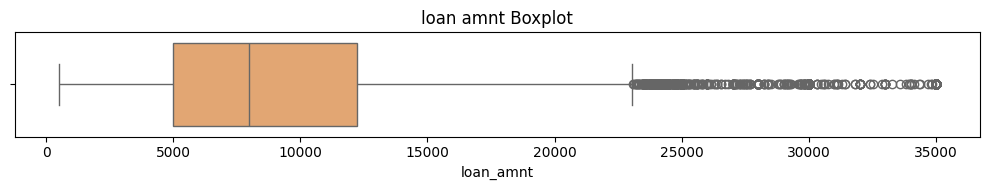


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


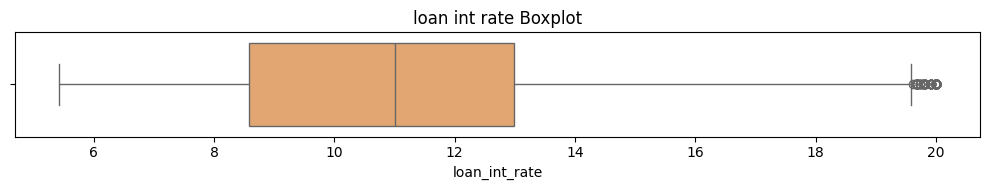


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


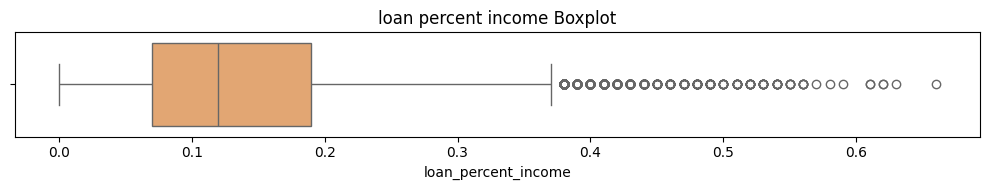


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


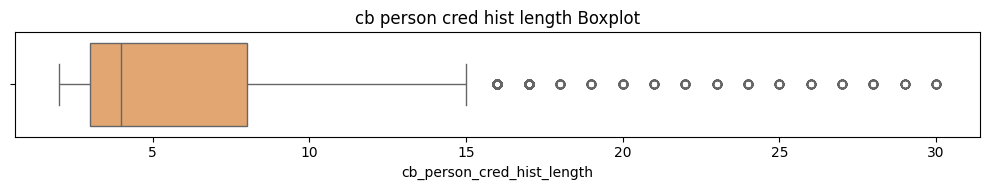


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


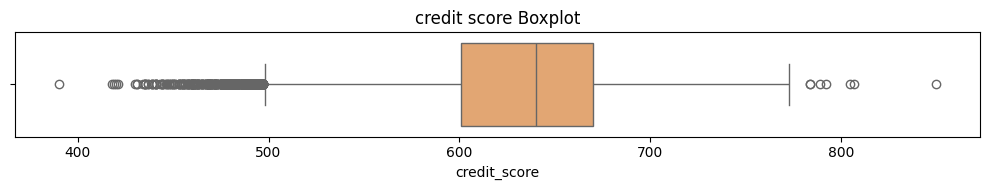


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [13]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe().T)

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

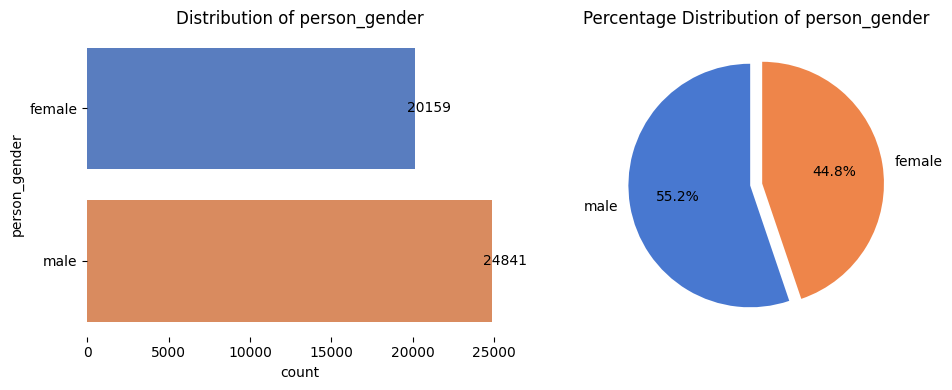

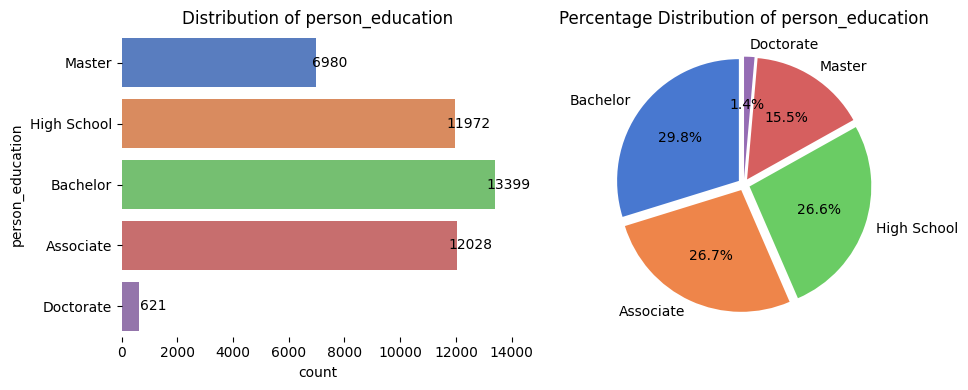

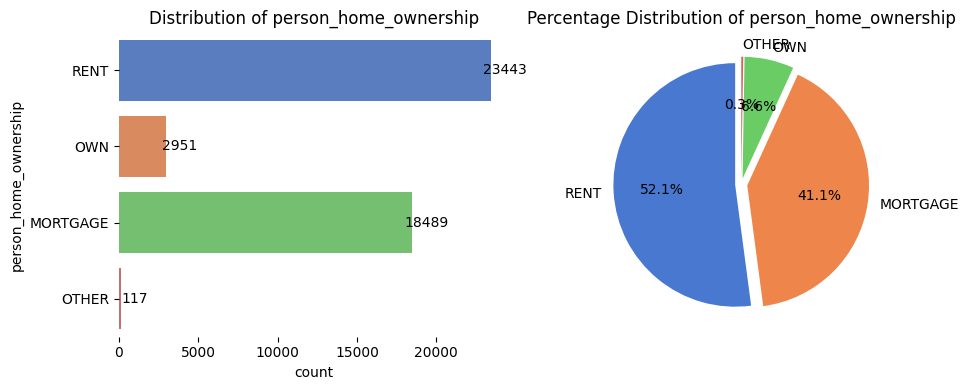

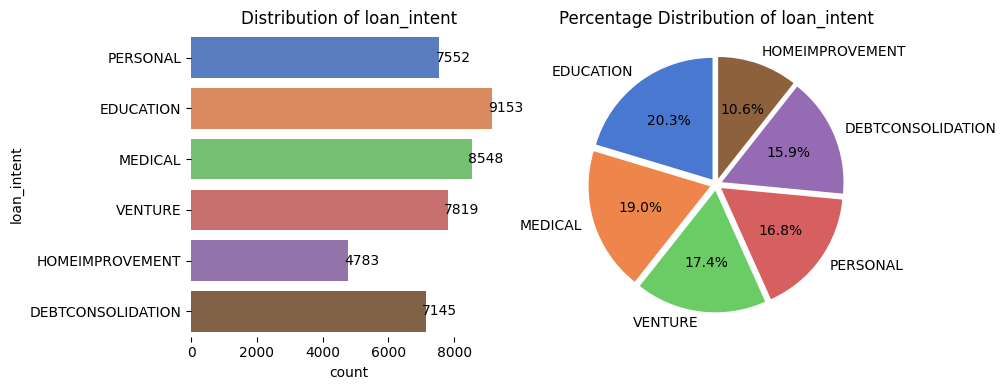

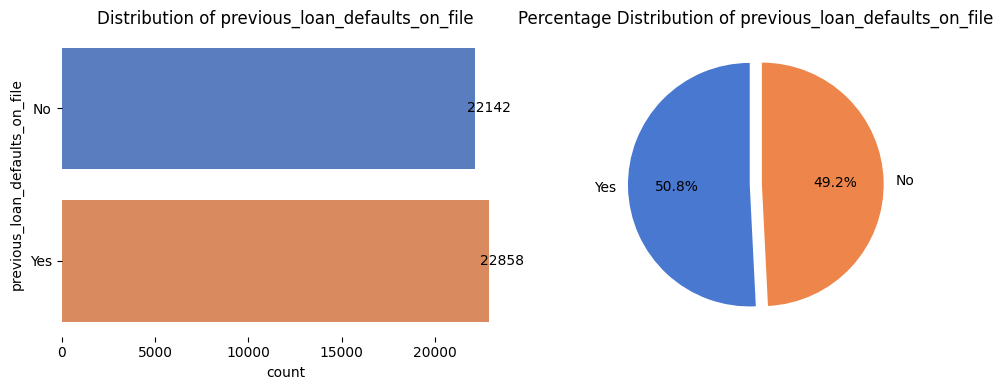

In [14]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

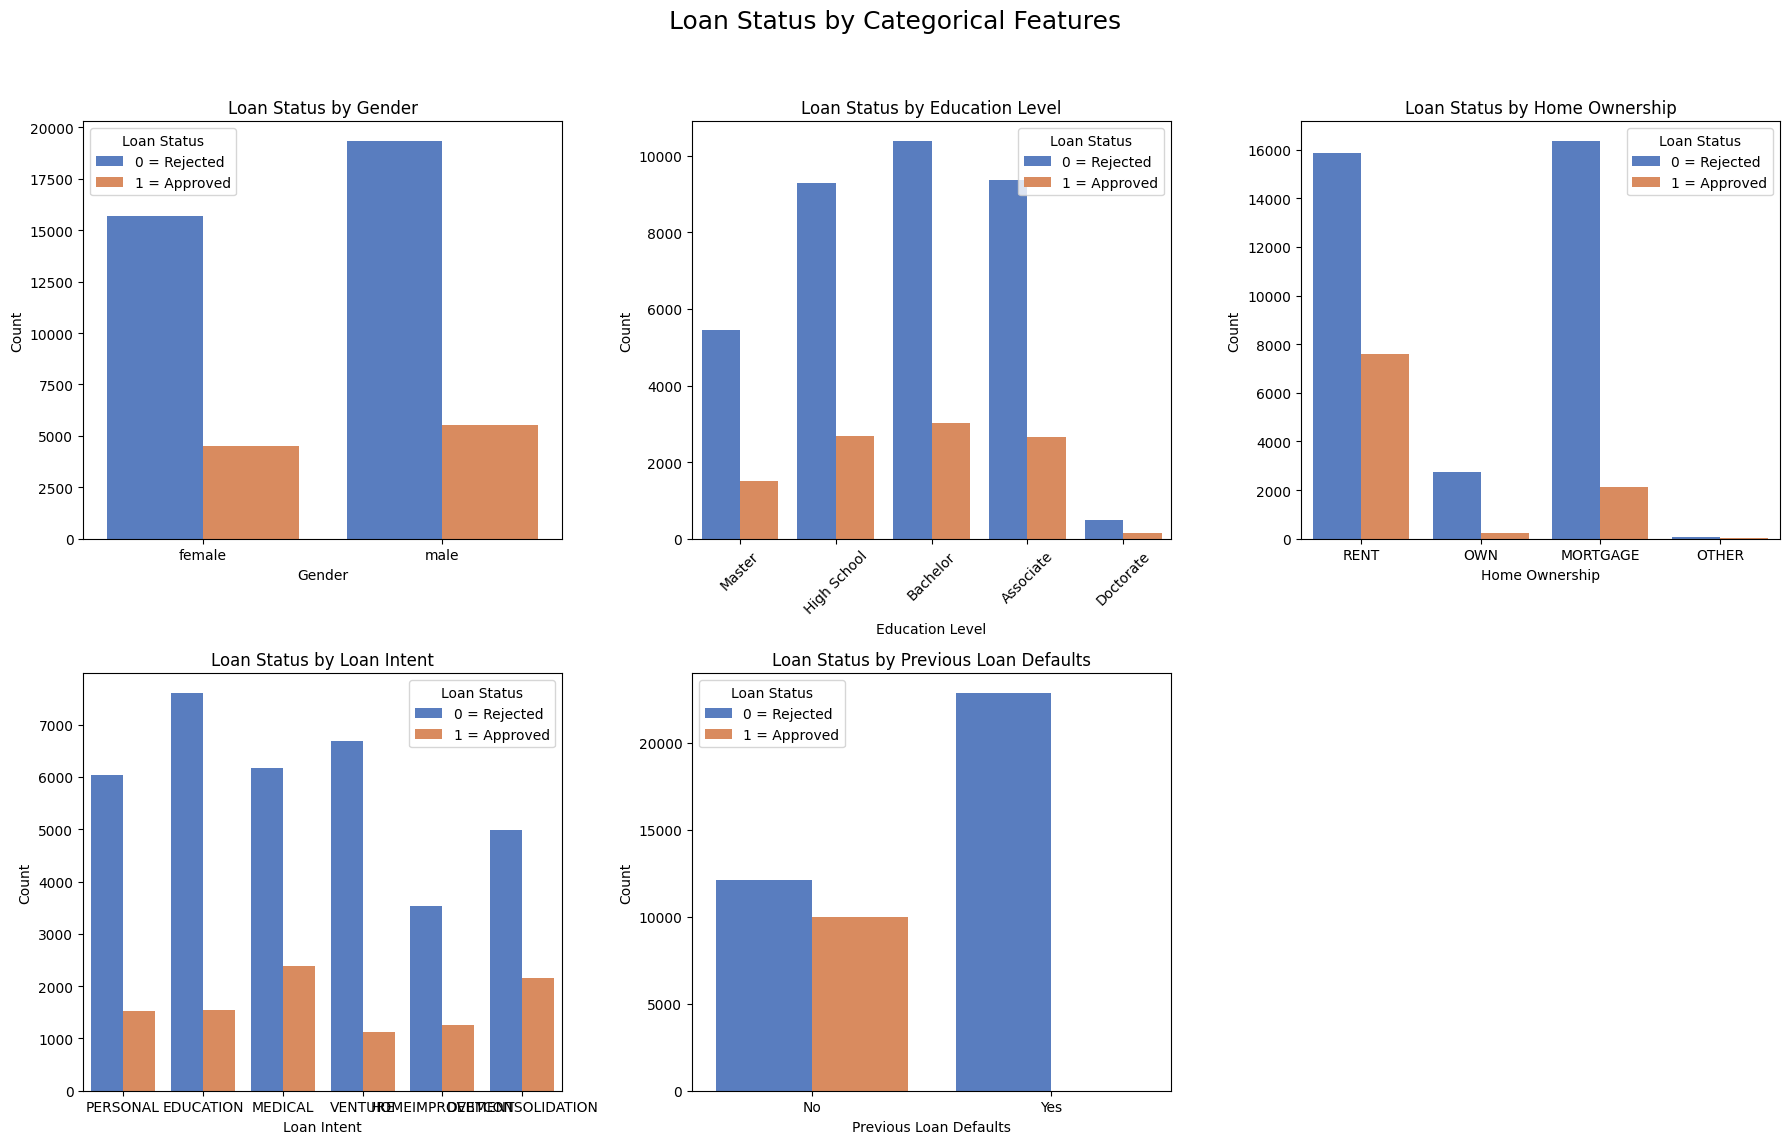

In [15]:
# Create subplots for loan status by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

# Visualization for person_gender vs loan_status
sns.countplot(data=df, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for person_education vs loan_status
sns.countplot(data=df, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization for person_home_ownership vs loan_status
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for loan_intent vs loan_status
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for previous_loan_defaults_on_file vs loan_status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Hide the last subplot (if not needed)
fig.delaxes(axes[1][2])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

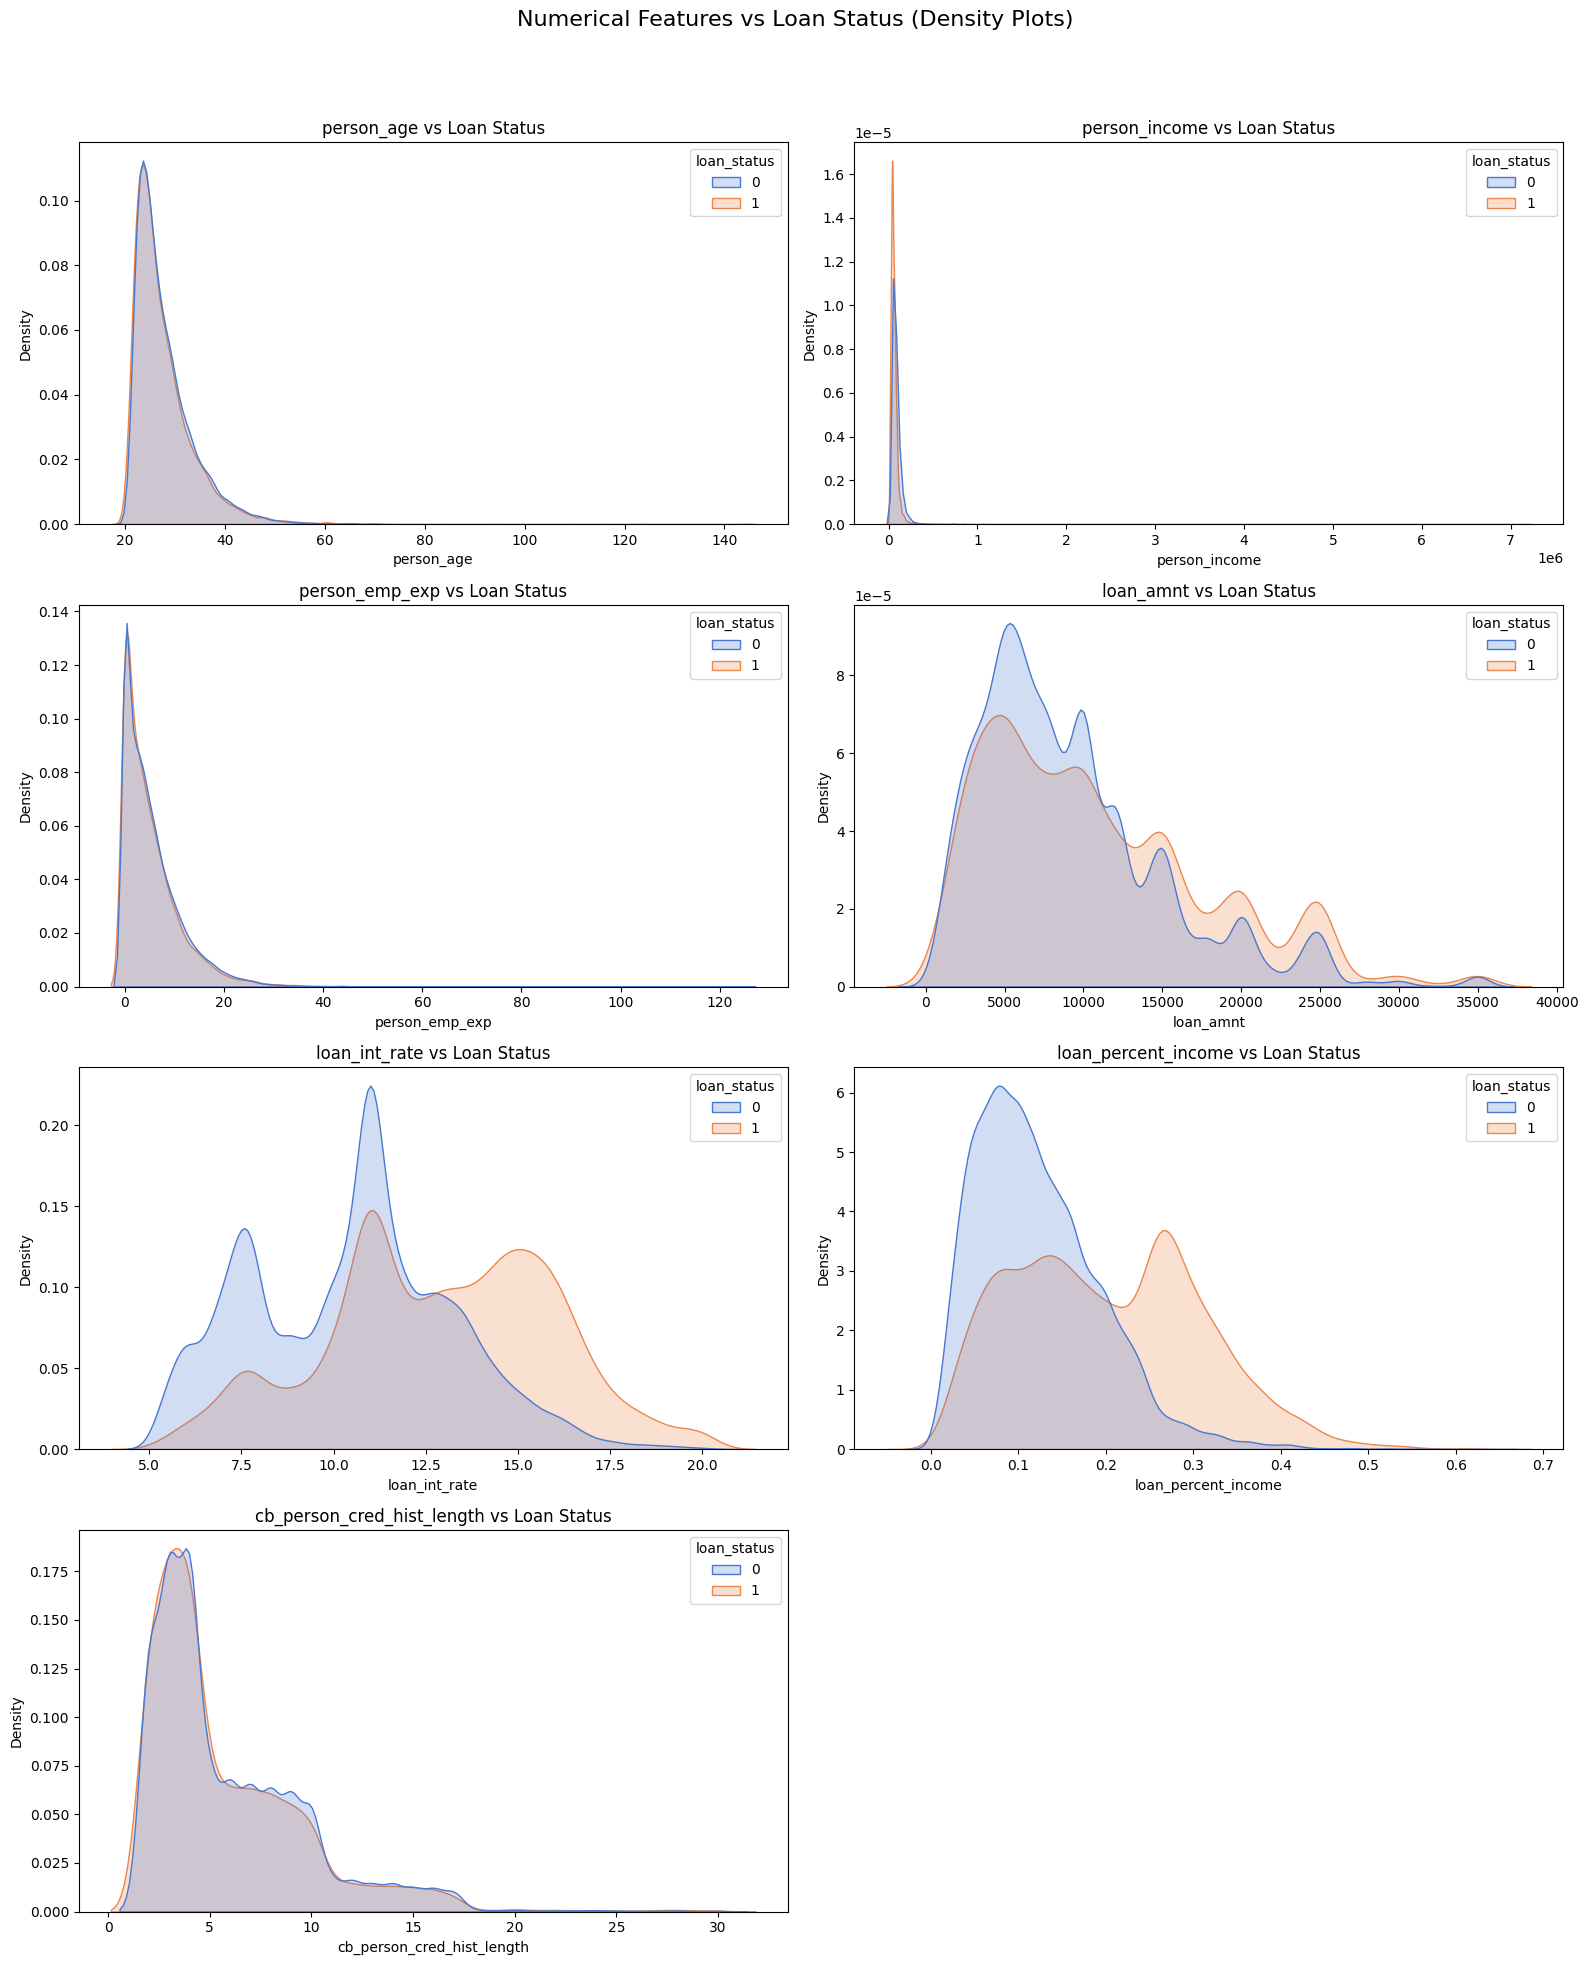

In [16]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

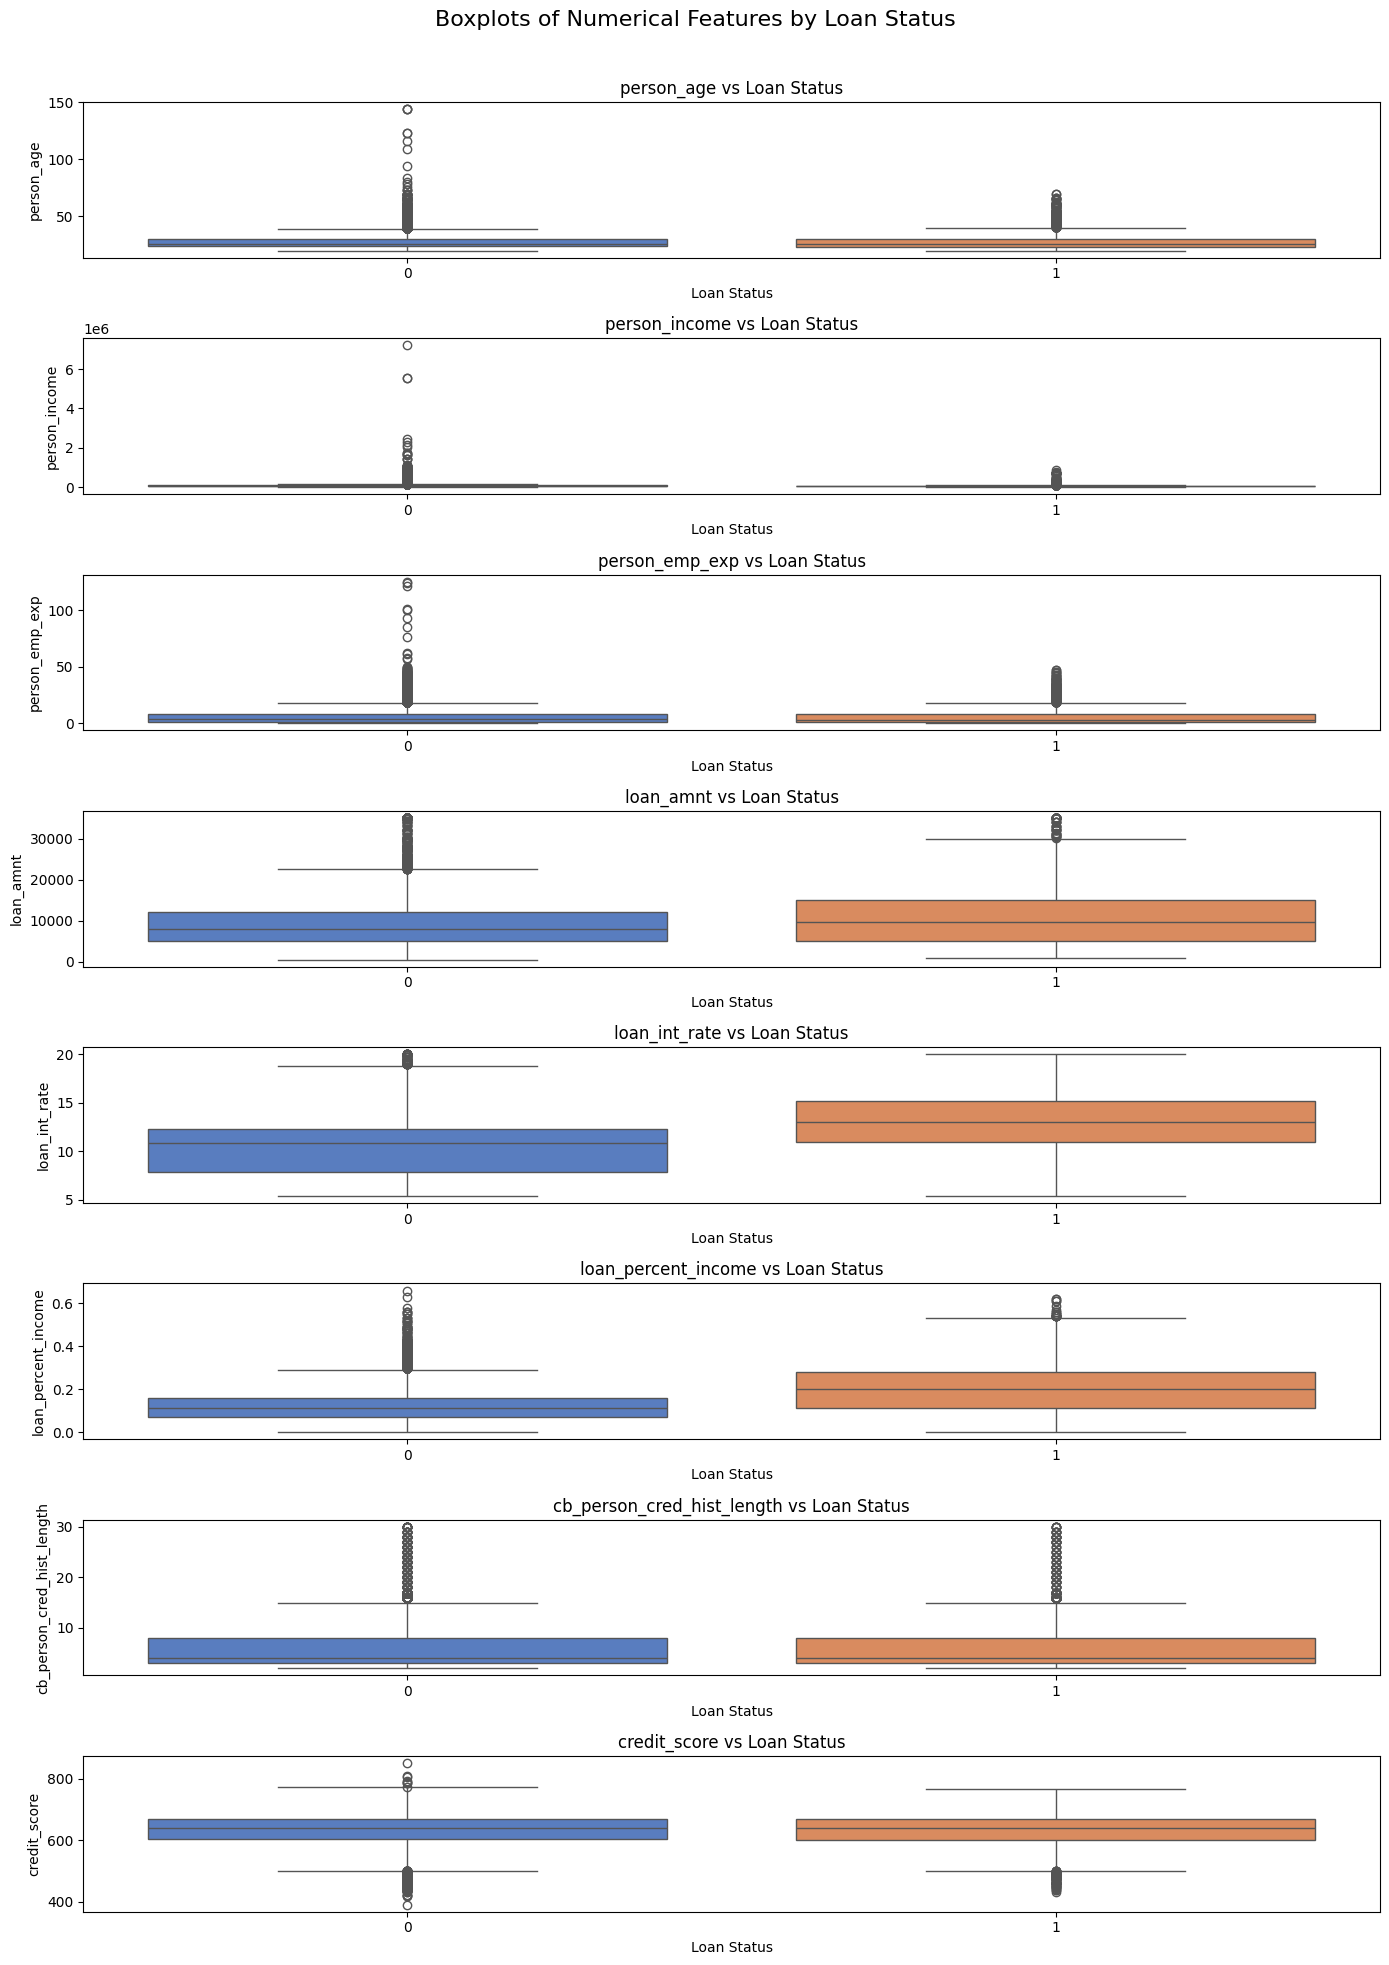

In [17]:
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 20))
fig.suptitle('Boxplots of Numerical Features by Loan Status', fontsize=16)

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df, x='loan_status', y=feature, ax=axes[i], palette='muted')
    axes[i].set_title(f'{feature} vs Loan Status')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(feature)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [18]:
np.isinf(df[numerical_columns]).sum()

person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64

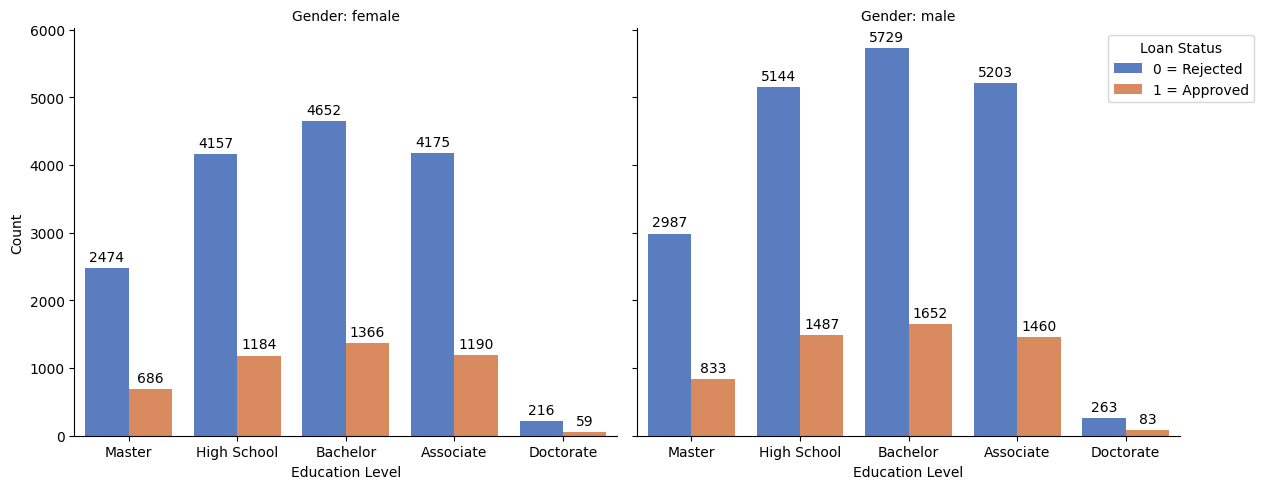

In [19]:
# Create the catplot for person_education vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_education', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Education Level", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

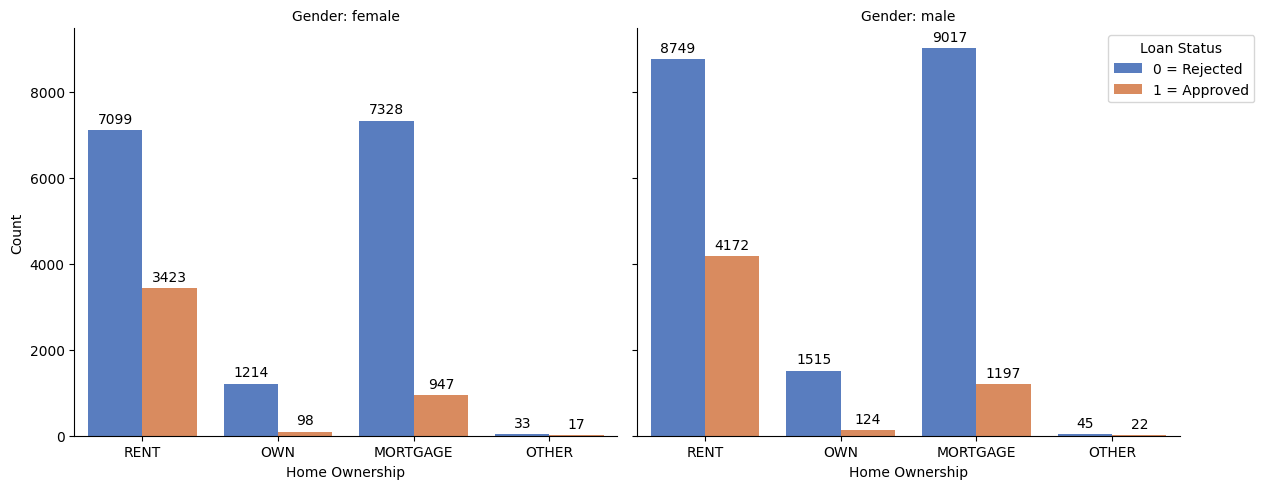

In [20]:
# Create the catplot for person_home_ownership vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_home_ownership', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Home Ownership", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

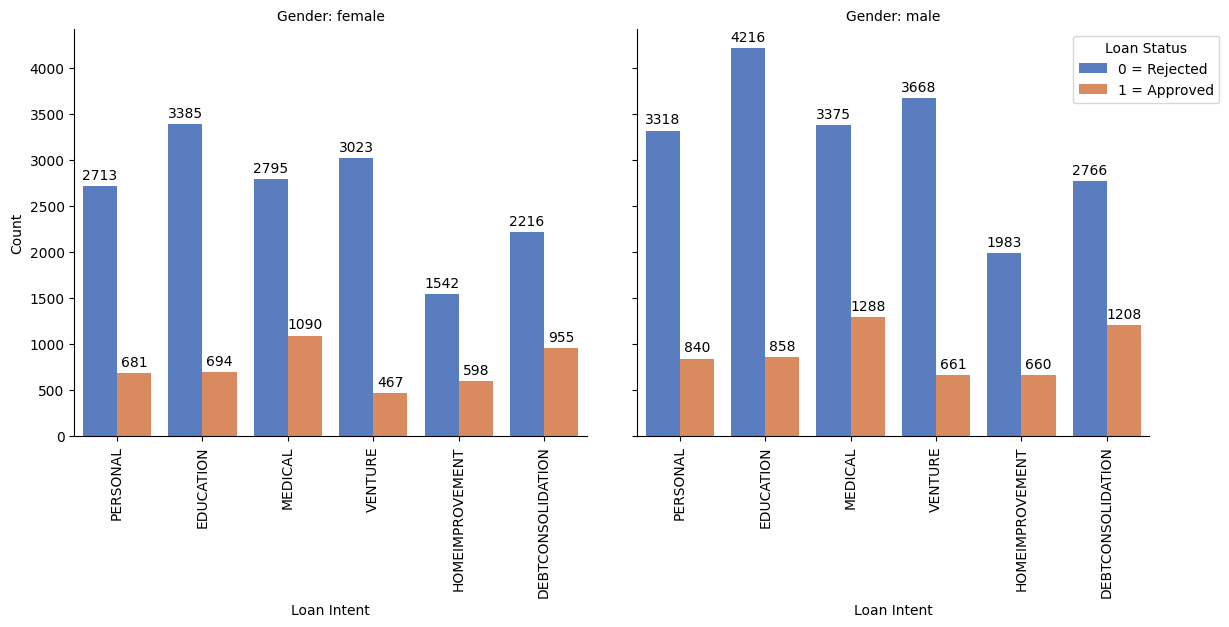

In [21]:
# Create the catplot for loan_intent vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='loan_intent', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Loan Intent", "Count")
g.set_titles("Gender: {col_name}")

# Rotate x-axis labels by 90 degrees
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

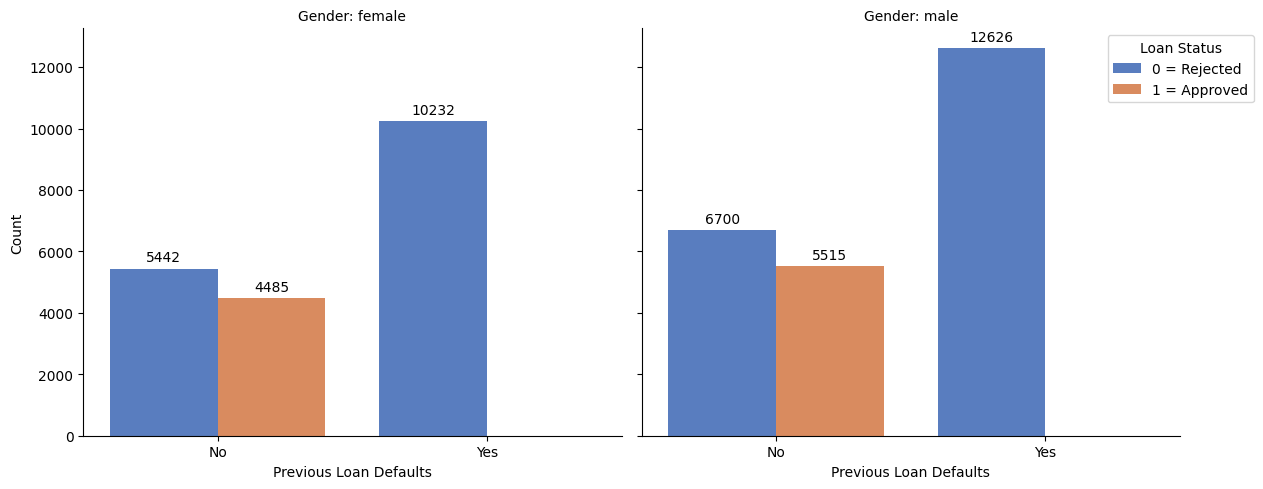

In [22]:
# Create the catplot for previous_loan_defaults_on_file vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='previous_loan_defaults_on_file', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Previous Loan Defaults", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

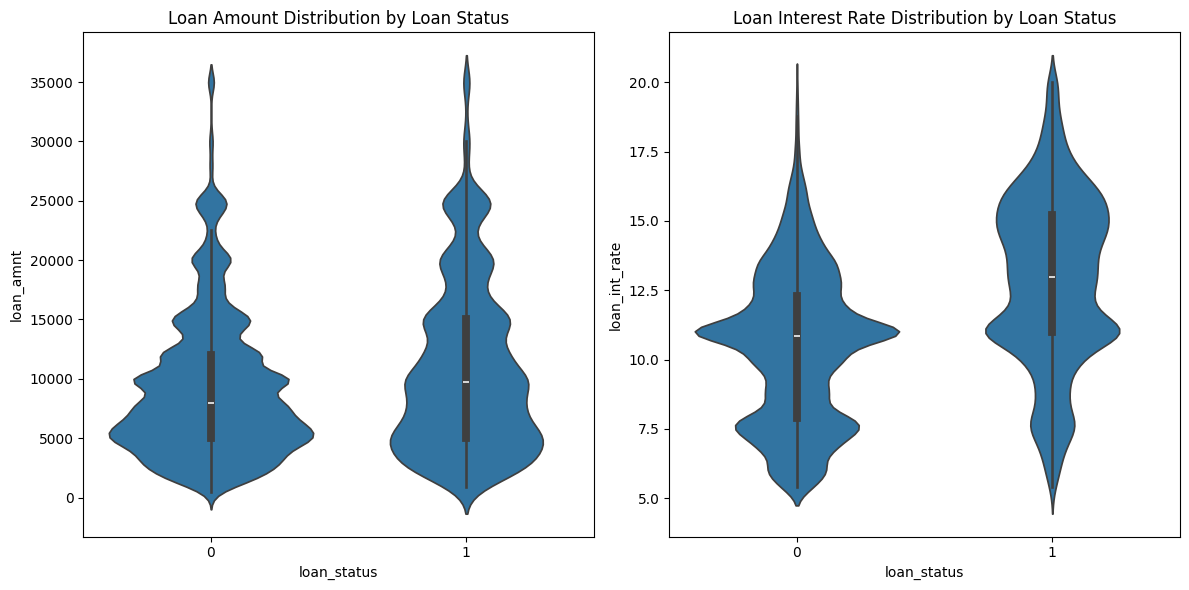

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution by Loan Status')

plt.subplot(1, 2, 2)
sns.violinplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Loan Interest Rate Distribution by Loan Status')

plt.tight_layout()
plt.show()

# **PreProcessing of Data**

In [24]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [25]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

In [26]:
# Analyze the 'person_age' column
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe().T)


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


## Cheak Outlier

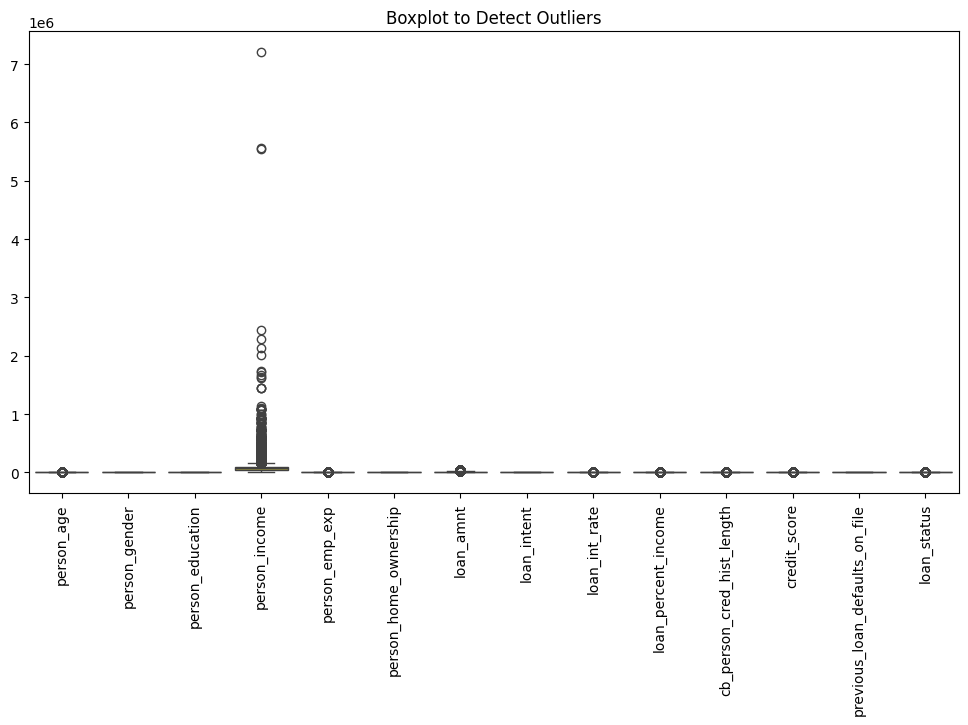

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot to Detect Outliers")
plt.show()


In [30]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df):
    df_numeric = df.select_dtypes(include=[np.number])  # فقط الأعمدة الرقمية
    Q1 = df_numeric.quantile(0.25)  
    Q3 = df_numeric.quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

# تحديد القيم الشاذة
outliers = detect_outliers_iqr(df)
print(outliers.sum())  # عدد القيم الشاذة لكل متغير


person_age                         2181
person_gender                         0
person_education                      0
person_income                      2218
person_emp_exp                     1724
person_home_ownership                 0
loan_amnt                          2348
loan_intent                           0
loan_int_rate                       124
loan_percent_income                 744
cb_person_cred_hist_length         1366
credit_score                        467
previous_loan_defaults_on_file        0
loan_status                       10000
dtype: int64


In [31]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df):
    df_numeric = df.select_dtypes(include=[np.number]) 
    Q1 = df_numeric.quantile(0.25)  
    Q3 = df_numeric.quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

outliers = detect_outliers_iqr(df)
print(outliers.sum())  


person_age                         2181
person_gender                         0
person_education                      0
person_income                      2218
person_emp_exp                     1724
person_home_ownership                 0
loan_amnt                          2348
loan_intent                           0
loan_int_rate                       124
loan_percent_income                 744
cb_person_cred_hist_length         1366
credit_score                        467
previous_loan_defaults_on_file        0
loan_status                       10000
dtype: int64


In [32]:
def replace_outliers_with_median(df):
    df_numeric = df.select_dtypes(include=[np.number])  # فقط الأعمدة الرقمية
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_median = df.copy()
    
    for col in df_numeric.columns:
        median = df[col].median()
        df_median[col] = np.where(df[col] < lower_bound[col], median, df[col])
        df_median[col] = np.where(df[col] > upper_bound[col], median, df[col])
    
    return df_median

df_median = replace_outliers_with_median(df)
print("✅ تم استبدال القيم الشاذة بالوسيط!")


✅ تم استبدال القيم الشاذة بالوسيط!


In [33]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df):
    df_numeric = df.select_dtypes(include=[np.number]) 
    Q1 = df_numeric.quantile(0.25)  
    Q3 = df_numeric.quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

outliers = detect_outliers_iqr(df_median)
print(outliers.sum())  


person_age                        1558
person_gender                        0
person_education                     0
person_income                      918
person_emp_exp                     780
person_home_ownership                0
loan_amnt                           77
loan_intent                          0
loan_int_rate                        0
loan_percent_income                478
cb_person_cred_hist_length        1201
credit_score                       460
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64


In [34]:
import numpy as np

def winsorize_outliers(df):
    df_numeric = df.select_dtypes(include=[np.number])  # اختيار الأعمدة الرقمية فقط
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_winsorized = df.copy()
    
    for col in df_numeric.columns:
        df_winsorized[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
        df_winsorized[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])
    
    return df_winsorized

df_winsorized = winsorize_outliers(df)
print("✅ تم استبدال القيم الشاذة بالقيم الحدّية!")


✅ تم استبدال القيم الشاذة بالقيم الحدّية!


In [35]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df):
    df_numeric = df.select_dtypes(include=[np.number]) 
    Q1 = df_numeric.quantile(0.25)  
    Q3 = df_numeric.quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

outliers = detect_outliers_iqr(df_winsorized)
print(outliers.sum())  


person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      460
previous_loan_defaults_on_file      0
loan_status                         0
dtype: int64


In [36]:
df_cleaned = df[~detect_outliers_iqr(df_winsorized).any(axis=1)]

print(f"✅ عدد الصفوف قبل الإزالة: {df.shape[0]}")
print(f"✅ عدد الصفوف بعد الإزالة: {df_cleaned.shape[0]}")


✅ عدد الصفوف قبل الإزالة: 45000
✅ عدد الصفوف بعد الإزالة: 44540


# **Correlation Heatmap**

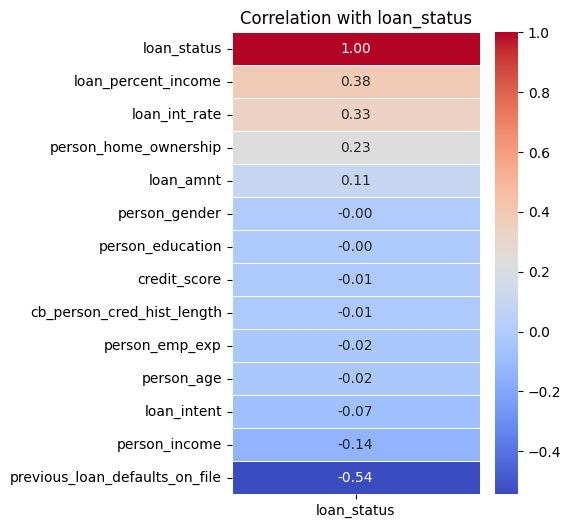

In [37]:
corr_matrix = df.corr()

target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()


# Oversampling

In [38]:
df_cleaned['loan_status'].value_counts()

loan_status
0    34637
1     9903
Name: count, dtype: int64

In [39]:
# Separate features and target from the train dataset
X = df_cleaned.drop(['loan_status'], axis=1)
y = df_cleaned['loan_status']

In [40]:
X.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [41]:
# df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


In [42]:
# df['loan_intent'].value_counts()

In [43]:
selected_features = [
    "previous_loan_defaults_on_file",
    "cb_person_cred_hist_length",
    "loan_percent_income",
    "person_age",
    "person_income",
    "loan_int_rate",
    "loan_intent",
    "person_home_ownership"
]

X_selected = X[selected_features]
X_selected

,previous_loan_defaults_on_file,cb_person_cred_hist_length,loan_percent_income,person_age,person_income,loan_int_rate,loan_intent,person_home_ownership
0,0,3.0,0.49,22.0,71948.0,16.02,4,3
1,1,2.0,0.08,21.0,12282.0,11.14,1,2
2,0,3.0,0.44,25.0,12438.0,12.87,3,0
3,0,2.0,0.44,23.0,79753.0,15.23,3,3
4,0,4.0,0.53,24.0,66135.0,14.27,3,3
...,...,...,...,...,...,...,...,...
44995,0,3.0,0.31,27.0,47971.0,15.66,3,3
44996,0,11.0,0.14,37.0,65800.0,14.07,2,3
44997,0,10.0,0.05,33.0,56942.0,10.02,0,3
44998,0,6.0,0.36,29.0,33164.0,13.23,1,3


In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.9, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


In [45]:
y_resampled.value_counts()

loan_status
0    34637
1    31173
Name: count, dtype: int64

# **Split for test data**

In [46]:
 # Split the data into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [47]:
# Use RobustScaler 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# **Applying Multiple Models for Predictions**

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10311
           1       0.92      0.94      0.93      9432

    accuracy                           0.94     19743
   macro avg       0.93      0.94      0.93     19743
weighted avg       0.94      0.94      0.94     19743



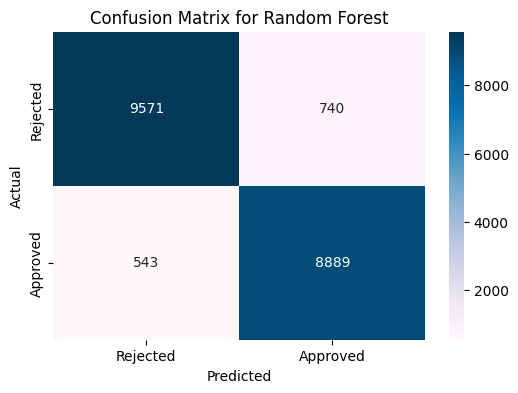



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     10311
           1       0.85      0.92      0.88      9432

    accuracy                           0.88     19743
   macro avg       0.88      0.88      0.88     19743
weighted avg       0.89      0.88      0.88     19743



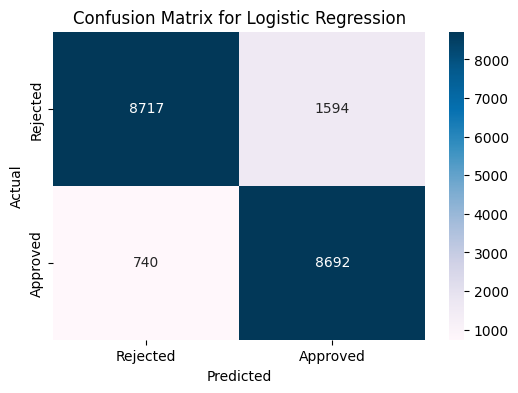



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10311
           1       0.91      0.90      0.90      9432

    accuracy                           0.91     19743
   macro avg       0.91      0.91      0.91     19743
weighted avg       0.91      0.91      0.91     19743



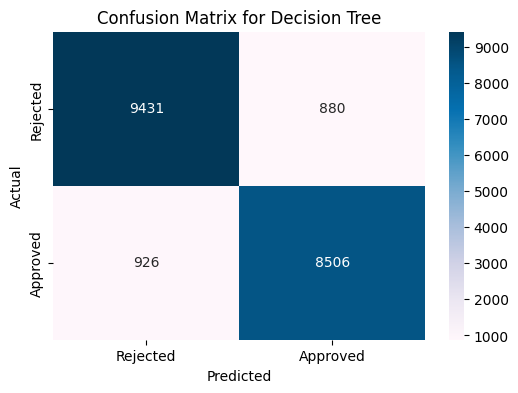



Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     10311
           1       0.86      0.94      0.90      9432

    accuracy                           0.90     19743
   macro avg       0.90      0.90      0.90     19743
weighted avg       0.90      0.90      0.90     19743



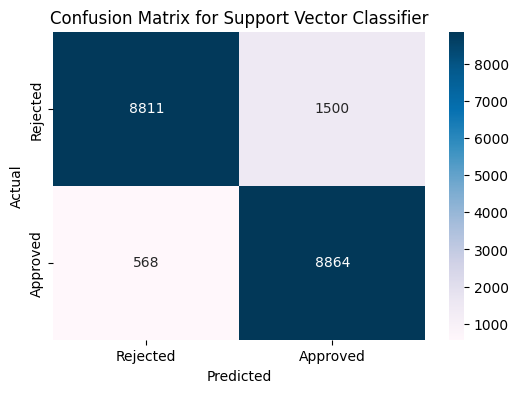



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10311
           1       0.88      0.93      0.90      9432

    accuracy                           0.90     19743
   macro avg       0.90      0.90      0.90     19743
weighted avg       0.91      0.90      0.90     19743



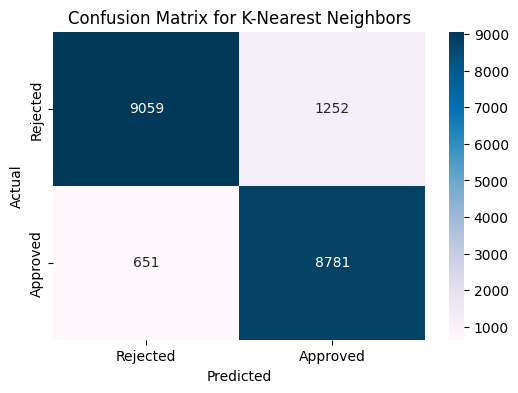



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10311
           1       0.96      0.94      0.95      9432

    accuracy                           0.95     19743
   macro avg       0.95      0.95      0.95     19743
weighted avg       0.95      0.95      0.95     19743



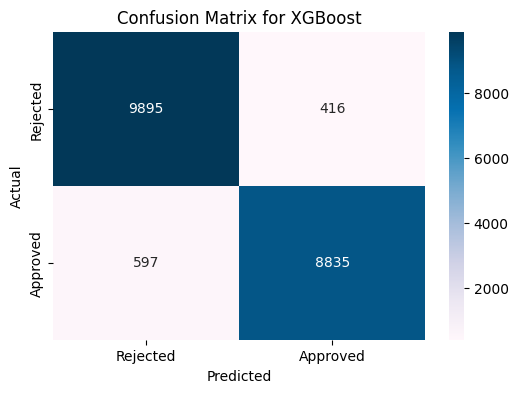



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10311
           1       0.95      0.94      0.94      9432

    accuracy                           0.95     19743
   macro avg       0.95      0.95      0.95     19743
weighted avg       0.95      0.95      0.95     19743



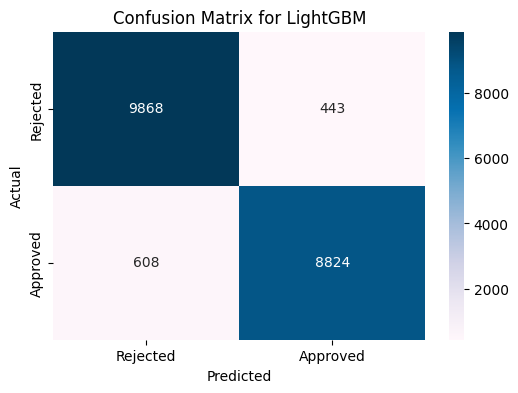



Classification Report for NaiveBayes:

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     10311
           1       0.72      0.99      0.84      9432

    accuracy                           0.82     19743
   macro avg       0.86      0.82      0.81     19743
weighted avg       0.86      0.82      0.81     19743



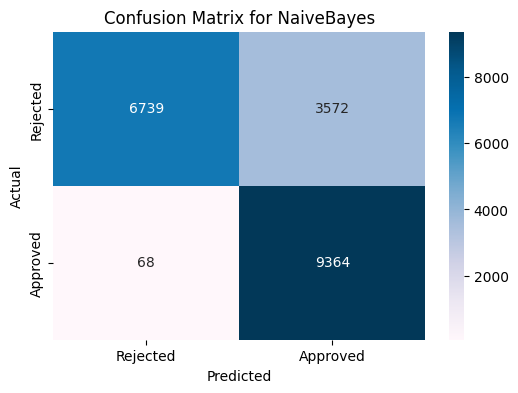



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10311
           1       0.96      0.94      0.95      9432

    accuracy                           0.95     19743
   macro avg       0.95      0.95      0.95     19743
weighted avg       0.95      0.95      0.95     19743



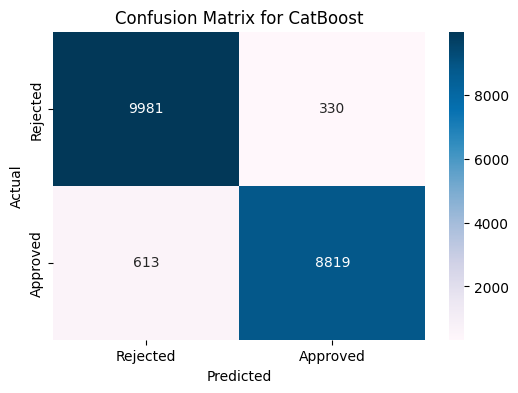

In [48]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# تعريف النماذج
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "NaiveBayes": GaussianNB(),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []
trained_models = {}  # قاموس لتخزين النماذج المدربة

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # التنبؤ على مجموعة التحقق
    y_val_pred = model.predict(X_val)
    
    # حساب الدرجات
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # تخزين النموذج
    trained_models[name] = model
    
    # طباعة تقرير التصنيف
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    
    # رسم مصفوفة الارتباك
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(results)

In [49]:
results_df


,Model,Train Score,Test Score,Accuracy Score
0,Random Forest,1.000000,0.935015,0.935015
1,Logistic Regression,0.877917,0.881781,0.881781
2,Decision Tree,1.000000,0.908525,0.908525
3,Support Vector Classifier,0.895348,0.895254,0.895254
4,K-Nearest Neighbors,0.930753,0.903611,0.903611
5,XGBoost,0.971194,0.948691,0.948691
6,LightGBM,0.954479,0.946766,0.946766
7,NaiveBayes,0.815768,0.815631,0.815631
8,CatBoost,0.965268,0.952236,0.952236


# **Best Model Selection for Loan Prediction**

In [50]:
# Identify the best model by accuracy
# best_model  # تحديد أفضل نموذج بناءً على أعلى دقة
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model = trained_models[best_model_name]  # استرجاع النموذج من القاموس

print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_model_row['Accuracy Score']:.4f}")



✅ Best Model: CatBoost with Accuracy: 0.9522


In [51]:

# حفظ النموذج الأفضل
best_model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, best_model_filename)

print(f"Best Model saved successfully as '{best_model_filename}'")


Best Model saved successfully as 'best_model_catboost.pkl'


In [52]:
_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: CatBoost with Accuracy: 0.9522


In [53]:
import joblib

# تحميل النموذج المحفوظ
loaded_model = joblib.load("best_model_catboost.pkl")


In [54]:
y_pred = loaded_model.predict(X_val)

print("Predictions:", y_pred)


Predictions: [1 1 1 ... 0 1 1]


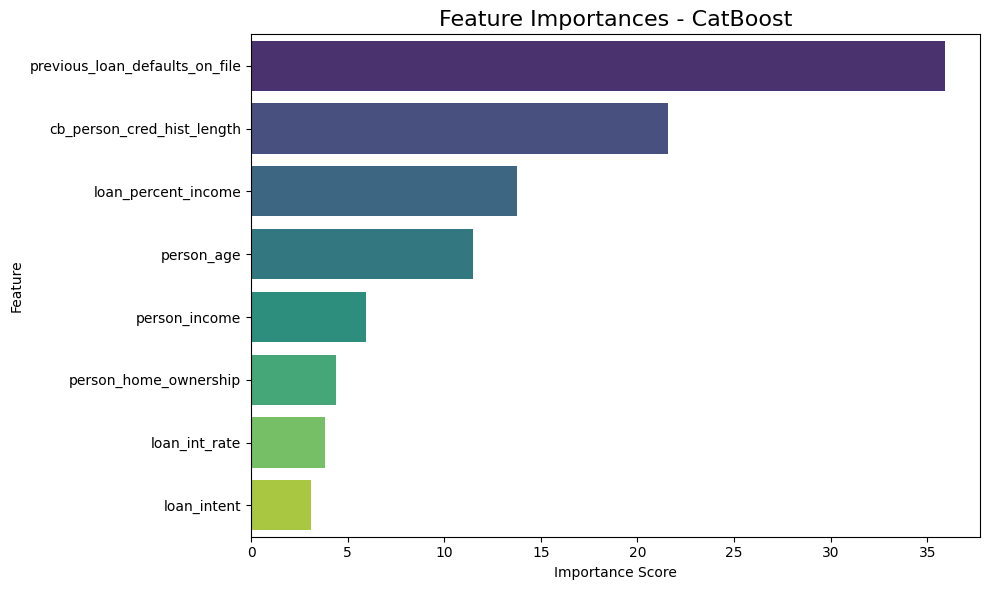

In [55]:
# Check if the best model supports feature importances
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_selected.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The {best_model_name} model does not support feature importances.")

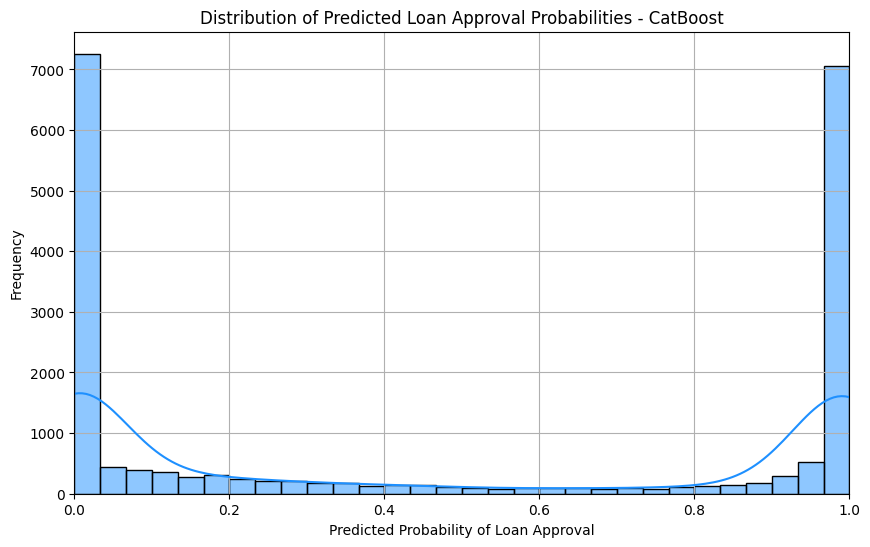

In [56]:
# Obtain predicted probabilities for the validation set
test_probabilities = best_model.predict_proba(X_val)[:, 1]  

# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(test_probabilities, bins=30, kde=True, color='dodgerblue')
plt.title(f'Distribution of Predicted Loan Approval Probabilities - {best_model_name}')
plt.xlabel('Predicted Probability of Loan Approval')
plt.ylabel('Frequency')
plt.xlim(0, 1) 
plt.grid()
plt.show()

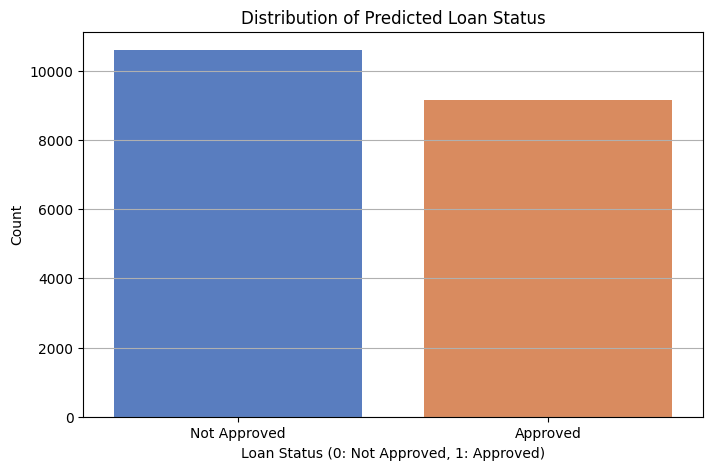

In [57]:
binary_predictions = (test_probabilities > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette='muted')
plt.title('Distribution of Predicted Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.grid(axis='y')
plt.show()

In [58]:
import joblib

model = joblib.load("best_model_catboost.pkl")
print("Model expects features:", model.feature_names_)


Model expects features: ['0', '1', '2', '3', '4', '5', '6', '7']
